This data set comes from the book Steven Skiena: Data Science Design Manual
chapter 6.1

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
path = "http://www.iam.fmph.uniba.sk/ospm/Rosa/PDV/01_nhanes-weight.xls"
#path = "01_nhanes-weight.xls"
data0 = pd.ExcelFile(path).parse('Sheet1')
data0.drop(labels="Gender",axis=1,inplace=True)

data0

Age  Weight  Height  Leg_Length  Arm_Length  Arm_circum  Waist
0     241    64.7     163        34.2        36.2        29.0   89.6
1     241    54.0     153        37.2        34.0        26.1   85.5
2     241    61.4     165        37.7        35.0        31.4   70.1
3     241    74.0     171        37.9        36.2        29.8   91.1
4     241    63.6     159        38.1        34.0        29.2   74.3
...   ...     ...     ...         ...         ...         ...    ...
4974  958    89.5     184        43.0        42.8        32.2  112.8
4975  959    78.6     151        35.6        34.2        33.5  114.9
4976  959    86.5     175        38.6        41.5        32.8  100.2
4977  959    58.0     163        40.2        37.5        26.2   82.8
4978  959    76.2     168        40.8        39.5        29.8  103.5

[4979 rows x 7 columns]

In [23]:
data0["Age"]/12

0       20.083333
1       20.083333
2       20.083333
3       20.083333
4       20.083333
          ...    
4974    79.833333
4975    79.916667
4976    79.916667
4977    79.916667
4978    79.916667
Name: Age, Length: 4979, dtype: float64

In [24]:
data = data0.copy(deep=True)
data["Age"] = data0["Age"]/12
data

Age  Weight  Height  Leg_Length  Arm_Length  Arm_circum  Waist
0     20.083333    64.7     163        34.2        36.2        29.0   89.6
1     20.083333    54.0     153        37.2        34.0        26.1   85.5
2     20.083333    61.4     165        37.7        35.0        31.4   70.1
3     20.083333    74.0     171        37.9        36.2        29.8   91.1
4     20.083333    63.6     159        38.1        34.0        29.2   74.3
...         ...     ...     ...         ...         ...         ...    ...
4974  79.833333    89.5     184        43.0        42.8        32.2  112.8
4975  79.916667    78.6     151        35.6        34.2        33.5  114.9
4976  79.916667    86.5     175        38.6        41.5        32.8  100.2
4977  79.916667    58.0     163        40.2        37.5        26.2   82.8
4978  79.916667    76.2     168        40.8        39.5        29.8  103.5

[4979 rows x 7 columns]

In [25]:
# chybajuce data
missing_values_count = data.isnull().sum()
print(missing_values_count)

Age           0
Weight        0
Height        0
Leg_Length    0
Arm_Length    0
Arm_circum    0
Waist         1
dtype: int64


In [26]:
# vyhodenie riadku s chybajucou hodnotou
data = data.dropna()
missing_values_count = data.isnull().sum()
print(missing_values_count)
print(data.shape)

Age           0
Weight        0
Height        0
Leg_Length    0
Arm_Length    0
Arm_circum    0
Waist         0
dtype: int64
(4978, 7)


In [27]:
data.describe().transpose()

count        mean        std         min         25%         50%  \
Age         4978.0   48.713238  16.432333   20.083333   34.833333   48.666667   
Weight      4978.0   81.411270  20.291984   32.400000   67.200000   78.800000   
Height      4978.0  167.598031  10.033765  140.000000  160.000000  167.000000   
Leg_Length  4978.0   38.328264   4.033124   23.700000   35.700000   38.400000   
Arm_Length  4978.0   37.479349   2.753507   29.500000   35.500000   37.400000   
Arm_circum  4978.0   33.147147   4.979115   19.500000   29.700000   32.800000   
Waist       4978.0   98.828264  15.832760   59.100000   87.500000   97.950000   

                   75%         max  
Age          62.333333   79.916667  
Weight       92.600000  218.200000  
Height      175.000000  204.000000  
Leg_Length   41.000000   55.500000  
Arm_Length   39.400000   47.700000  
Arm_circum   36.100000   55.500000  
Waist       108.300000  172.000000

<Axes: >

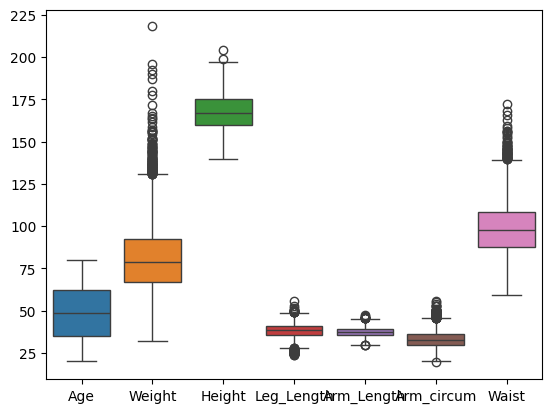

In [28]:
sns.boxplot(data=data)

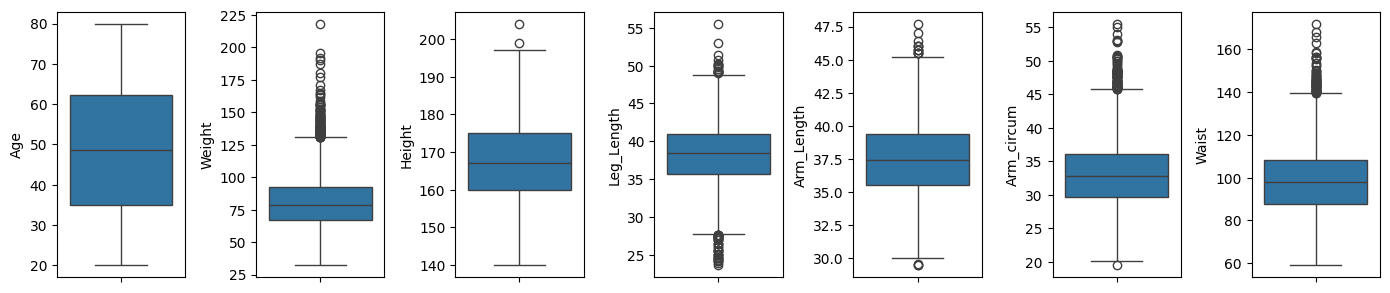

In [29]:
fig, axes = plt.subplots(1, 7, figsize=(14, 3))
axes = axes.flatten()

for i, column in enumerate(data.columns):
    sns.boxplot(data[column], ax=axes[i])
plt.tight_layout()

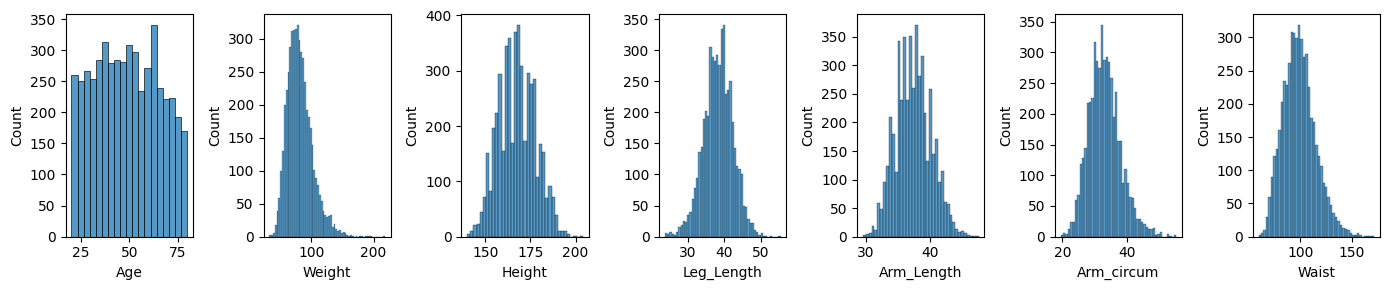

In [30]:
fig, axes = plt.subplots(1, 7, figsize=(14, 3))
axes = axes.flatten()

for i, column in enumerate(data.columns):
    sns.histplot(data[column], ax=axes[i])
plt.tight_layout()

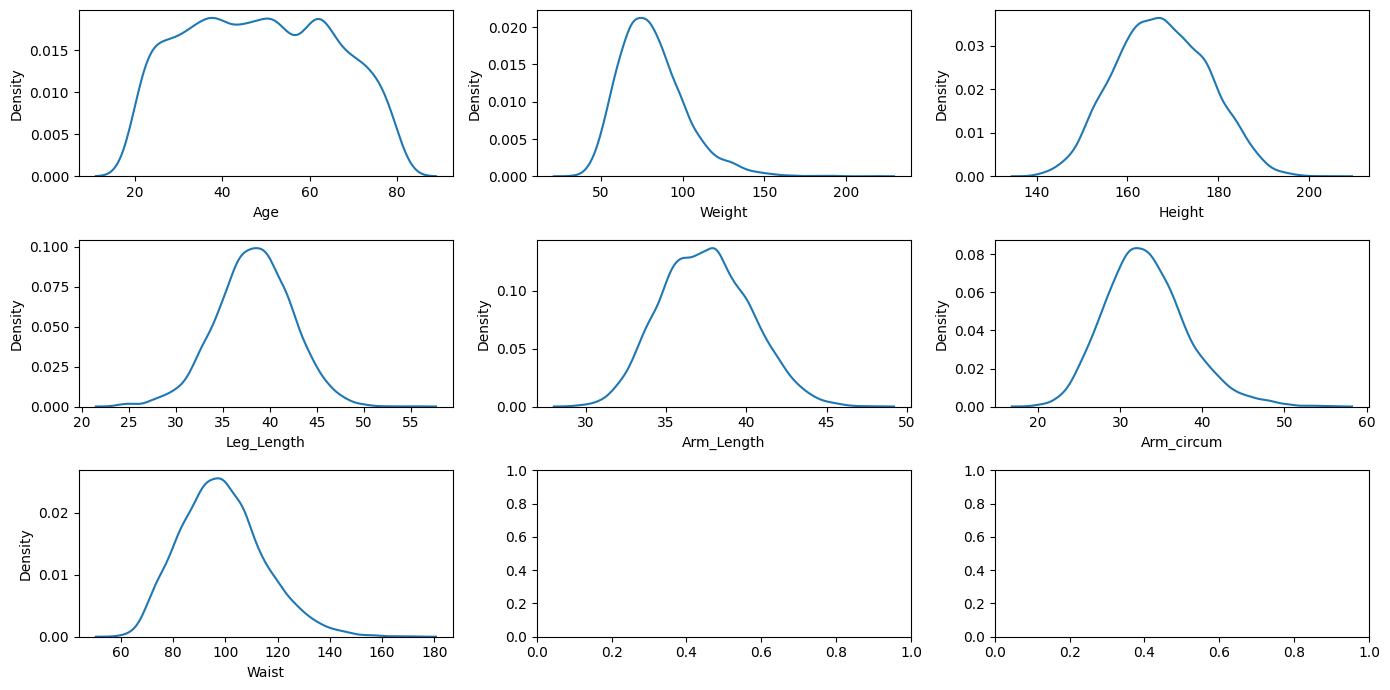

In [31]:
fig, axes = plt.subplots(3, 3, figsize=(14, 7))
axes = axes.flatten()

for i, column in enumerate(data.columns):
    sns.kdeplot(data[column], ax=axes[i])
plt.tight_layout()


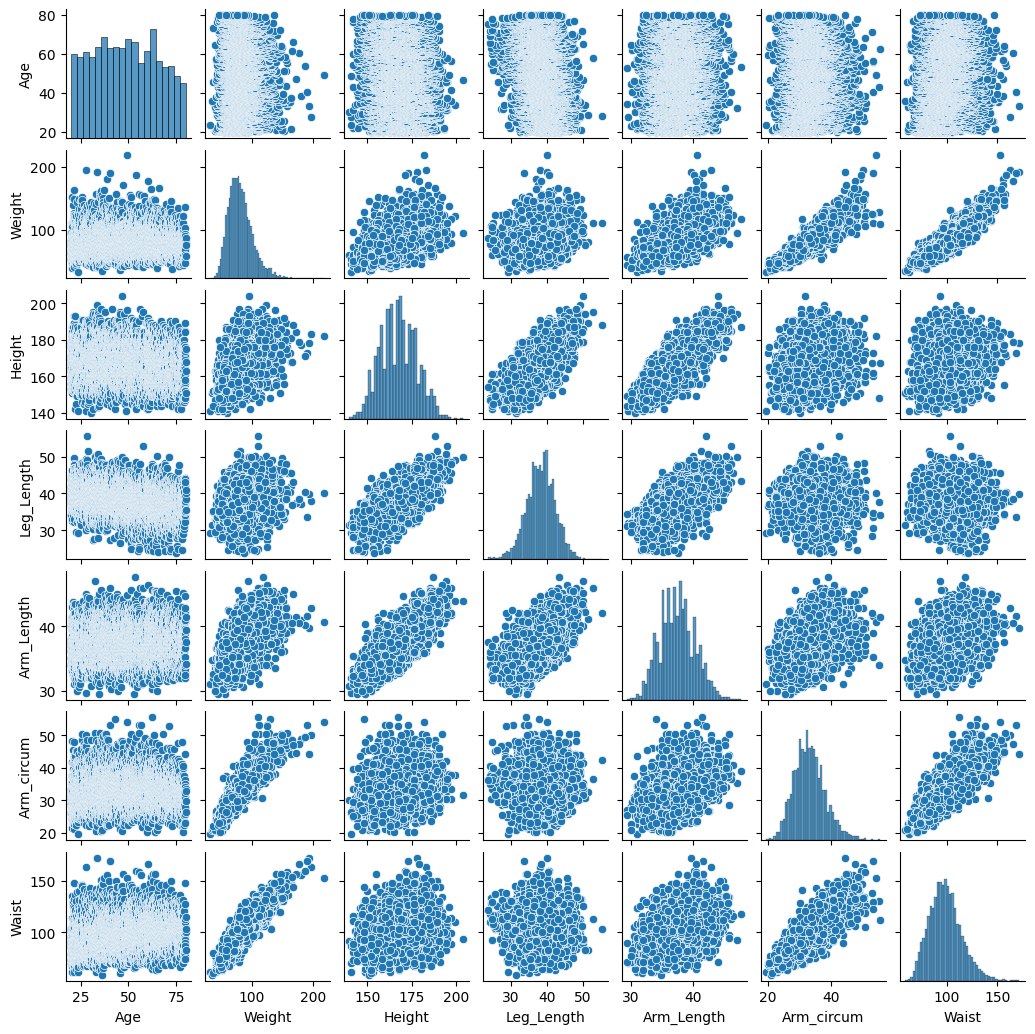

In [32]:
sns.pairplot(data, height=1.5)

In [35]:
data.corr(method='pearson')

Age    Weight    Height  Leg_Length  Arm_Length  Arm_circum  \
Age         1.000000  0.017161 -0.104986   -0.268197    0.053355    0.006692   
Weight      0.017161  1.000000  0.443266    0.238236    0.583572    0.889584   
Height     -0.104986  0.443266  1.000000    0.745203    0.800750    0.226396   
Leg_Length -0.268197  0.238236  0.745203    1.000000    0.614505    0.088533   
Arm_Length  0.053355  0.583572  0.800750    0.614505    1.000000    0.444428   
Arm_circum  0.006692  0.889584  0.226396    0.088533    0.444428    1.000000   
Waist       0.227538  0.891869  0.181536   -0.028937    0.401728    0.820541   

               Waist  
Age         0.227538  
Weight      0.891869  
Height      0.181536  
Leg_Length -0.028937  
Arm_Length  0.401728  
Arm_circum  0.820541  
Waist       1.000000

<Axes: >

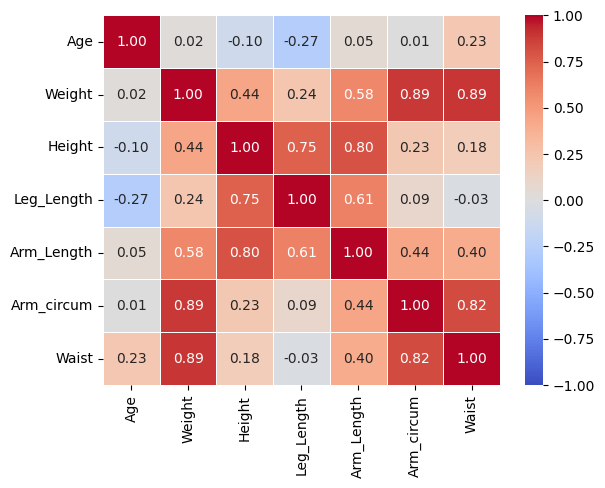

In [36]:
sns.heatmap(data.corr(method='pearson'), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)

In [37]:
data.corr(method='spearman')

Age    Weight    Height  Leg_Length  Arm_Length  Arm_circum  \
Age         1.000000  0.041615 -0.100419   -0.261972    0.050472    0.019934   
Weight      0.041615  1.000000  0.459186    0.269071    0.603719    0.893593   
Height     -0.100419  0.459186  1.000000    0.750419    0.794675    0.243509   
Leg_Length -0.261972  0.269071  0.750419    1.000000    0.619044    0.115821   
Arm_Length  0.050472  0.603719  0.794675    0.619044    1.000000    0.455599   
Arm_circum  0.019934  0.893593  0.243509    0.115821    0.455599    1.000000   
Waist       0.256717  0.877276  0.174956   -0.017040    0.395654    0.810242   

               Waist  
Age         0.256717  
Weight      0.877276  
Height      0.174956  
Leg_Length -0.017040  
Arm_Length  0.395654  
Arm_circum  0.810242  
Waist       1.000000

<Axes: >

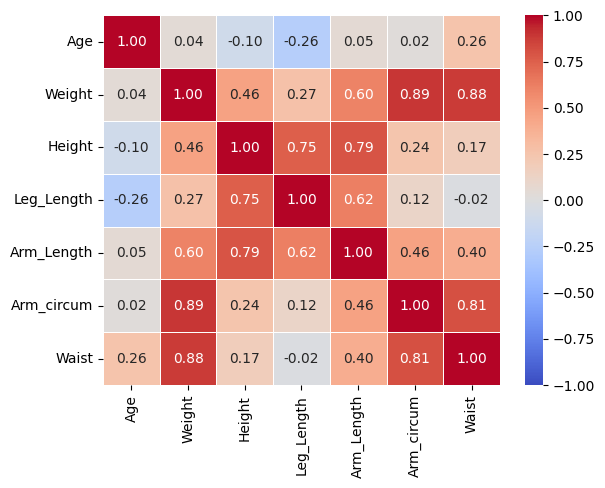

In [39]:
sns.heatmap(data.corr(method='spearman'), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)

# Dobrovolna DU:
V povodnych datach su aj udaje o pohlavi. Spravte celu analyzu pre muzov a zeny. Co vychadza inak a co vychadza rovnako/podobne? Ake vyrazne su rozdiely?